# K-NN Classification

The goal of this project is to create a machine learning model that will be able to predict which authors wrote which reveiews from the [data set](https://archive.ics.uci.edu/ml/datasets/Amazon+Commerce+reviews+set). 

As a means of preprocessing the data I implemented Term Frequency - Inverse Document Frequency (tf-idf) and PCA to better prepare my data for learning. 

## Data Extraction and Preprocessing

In [1]:
#Below are the necessary imports for manipulating our 
#raw data in order to prepare it for preprocessing and manipulation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import preprocessing

In [2]:
#Read our csv file
df = pd.read_csv('Amazon_initial_50_30_10000.csv')
df

,the,and,a,of,to,is,I,in,that,it,...,ra_,le_to,bra,uch_a,ave_a,n_in_,ied_,nd_b,rso,class.1
0,5,3,4,4,1,5,1,3,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,3,6,2,3,4,2,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,2,4,4,2,2,2,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,4,6,5,4,2,1,0,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,4,7,5,4,5,0,1,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15,11,5,9,10,0,5,6,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,12,7,7,5,5,3,3,2,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,8,10,2,4,2,0,2,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,11,12,10,7,8,4,4,7,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Remove all columns containing only NaN values
df.dropna(axis=1,how='all',inplace = True)

#Assign the author column as a seperate independent variable and 
#label each authors' name as an integer 
author= df.iloc[:,-1]
label_encoder = preprocessing.LabelEncoder()
author = label_encoder.fit_transform(author)

#Remove author column from dataset
df = df.iloc[:,:-1]

In [4]:
df

,the,and,a,of,to,is,I,in,that,it,...,ng_c,t_wh,_tu,bein,'\'\'\'\'\'\'\'\'\'\'r\'\'\'\'\'\'\'\'\'\'\'',sma,er_p,nis,e_pe,_aft
0,5,3,4,4,1,5,1,3,2,4,...,1,0,0,0,1,0,1,0,0,0
1,12,3,6,2,3,4,2,0,1,3,...,0,0,0,5,0,1,0,0,0,0
2,3,2,2,4,4,2,2,2,3,1,...,2,0,0,6,0,0,0,0,1,0
3,18,4,6,5,4,2,1,0,4,3,...,0,0,0,0,0,0,0,0,0,0
4,13,4,7,5,4,5,0,1,0,4,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15,11,5,9,10,0,5,6,1,3,...,0,0,0,0,0,0,1,0,2,0
1496,12,7,7,5,5,3,3,2,1,5,...,1,0,0,0,0,0,0,0,0,0
1497,8,10,2,4,2,0,2,3,1,1,...,0,0,0,0,0,0,0,0,0,0
1498,11,12,10,7,8,4,4,7,2,2,...,0,0,0,0,0,0,0,0,1,2


In [5]:
author

array([ 0,  0,  0, ..., 49, 49, 49])

As a step in my preprocessing, I will remove all "stop words" found in the nltk library from my dataset. These are common words that hold little bearing in the indentification of an author. Words such as "a" and "the".

In [6]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
for i in df.columns:
    if i.lower() in stop:
        df = df.drop(i,axis=1)
        
df

,book,one,like,also,well,good,get,time,would,use,...,ng_c,t_wh,_tu,bein,'\'\'\'\'\'\'\'\'\'\'r\'\'\'\'\'\'\'\'\'\'\'',sma,er_p,nis,e_pe,_aft
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,5,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,2,0,0,6,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,2,0
1496,0,2,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1497,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


There are some columns from the dataset with values of apparently random apostrophes and backslahes. Since these columns apear meaningless I would like to get rid of them so then they don't clutter or potentially weaken my model.

In [7]:
#removes all columns with backslashes in the name
df = df[df.columns.drop(list(df.filter(regex=r"\\")))] 

In [8]:
df

,book,one,like,also,well,good,get,time,would,use,...,ly_f,ng_c,t_wh,_tu,bein,sma,er_p,nis,e_pe,_aft
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,5,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,6,0,0,0,1,0
3,0,1,0,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,2,0
1496,0,2,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1497,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2


As another step in my preprocessing I implement the Term Frequency-Inverse Domain Frequency (TF-IDF) method. This is a well known effective method which weights different words according to apparent importance. 
More detail on this method can be found at the bottom of the page.

In [9]:
#Dataframe containing the frequency of each word in its respective review.
termFreq = (df.T/df.T.sum()).T

#Inverse document frequencies for each string(feature)
review_count = len(df.index) #total number of reviews(samples)
uniq_word = df.gt(0).sum() #total number of documents in which each string or feature appears
idf = np.log(review_count/uniq_word) #inverse document frequency 

#final TF-IDF dataframe
tf_idf = termFreq*idf
tf_idf

,book,one,like,also,well,good,get,time,would,use,...,ly_f,ng_c,t_wh,_tu,bein,sma,er_p,nis,e_pe,_aft
0,0.000000,0.000000,0.000000,0.000476,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000905,0.0,0.0,0.000000,0.000000,0.000860,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000492,0.000000,0.000000,0.000574,...,0.000000,0.000000,0.0,0.0,0.004030,0.000728,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000574,...,0.000000,0.001530,0.0,0.0,0.004842,0.000000,0.000000,0.000000,0.000719,0.000000
3,0.000000,0.000157,0.000000,0.000000,0.0,0.000000,0.000000,0.000336,0.000351,0.000799,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000357,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000723,0.000000,0.000651,0.000655,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.000000,0.000128,0.000000,0.000000,0.0,0.000000,0.000000,0.000273,0.000286,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000412,0.000000,0.000814,0.000000
1496,0.000000,0.000282,0.000000,0.000251,0.0,0.000288,0.000000,0.000000,0.000316,0.000000,...,0.000000,0.000477,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1497,0.000449,0.000499,0.000441,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1498,0.000000,0.000144,0.000000,0.000257,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000462,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000459,0.000992


In order to further reduce the number of features in the dataset, I'll use PCA.

## Implementing PCA

In [10]:
from sklearn.decomposition import PCA
X_PCA = PCA(n_components=0.90) #Specifying that we want to maintain 90% 
                               #energy capture of the original dataset.
X_PCA = X_PCA.fit_transform(tf_idf)
X_PCA = pd.DataFrame(X_PCA)
X_PCA

,0,1,2,3,4,5,6,7,8,9,...,923,924,925,926,927,928,929,930,931,932
0,0.001952,0.003214,-0.000922,0.004469,-0.000648,0.000574,0.003957,0.001321,-0.000826,0.001316,...,-0.000504,-0.000245,-0.000566,0.000201,-0.000089,-0.000839,0.000073,-0.000232,-0.000007,0.000231
1,0.001697,0.001194,-0.002446,0.001432,0.000515,-0.001158,0.002369,0.000979,-0.000258,0.000041,...,-0.000275,0.000267,-0.000230,0.000264,0.000212,0.000116,0.000018,-0.000306,-0.000075,0.000155
2,0.001916,0.000329,-0.000636,-0.000286,-0.001789,-0.001459,0.001971,-0.000865,0.001383,-0.000401,...,-0.000123,-0.000191,0.000112,-0.000255,0.000026,-0.000025,0.000004,-0.000271,-0.000215,-0.000401
3,0.001618,0.001964,-0.001299,0.001173,-0.000829,-0.000434,0.001672,-0.002663,-0.000637,-0.000529,...,-0.000318,0.000386,0.000464,0.000144,0.000069,-0.000267,0.000072,0.000269,0.000189,-0.000633
4,0.002322,0.001429,-0.001218,0.002574,-0.000409,-0.000862,0.001636,0.000767,0.000097,-0.000734,...,-0.000418,0.000160,0.000180,0.000837,0.000271,-0.000160,-0.000204,0.000095,-0.000148,-0.000609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.002311,-0.000150,-0.000340,-0.002089,-0.000859,-0.000879,0.001509,0.000025,0.000825,-0.001748,...,-0.000152,-0.000189,0.000256,0.000350,-0.000292,0.000006,-0.000125,-0.000072,0.000038,0.000189
1496,-0.000644,0.000026,-0.001896,-0.000725,0.002215,-0.001325,0.000102,0.000362,-0.000833,0.001330,...,-0.000108,0.000662,-0.000137,-0.000115,-0.000416,-0.000403,-0.000107,0.000046,-0.000380,0.000057
1497,-0.000722,-0.000607,-0.000654,-0.000128,-0.000764,0.001054,0.000498,-0.000203,0.000087,-0.000256,...,-0.000539,0.000058,-0.000088,-0.000160,-0.000212,-0.000128,0.000038,0.000299,0.000476,-0.000419
1498,-0.001997,-0.000254,0.000126,-0.001893,0.000132,-0.000510,0.001165,0.000444,-0.001359,-0.001391,...,0.000347,-0.000031,-0.000206,0.000195,-0.000297,0.000528,-0.000009,0.000348,-0.000153,0.001035


## K-nn 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Splitting our data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X_PCA, author, test_size=0.3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

Now I will find out the best possible value for the k hyperparameter.

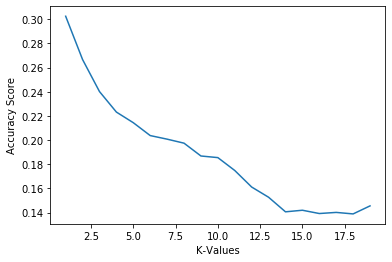

In [15]:
import time
from sklearn.model_selection import cross_val_score
k_pick_start = time.process_time() #start time for picking K
error_rate = []

#Calculate rate of miscalculation for each K
k_values = [i for i in range(1,20)]
k_acc_scores = []

for k in k_values: #For K values ranging from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    k_acc_scores.append(cv_scores.mean())
    
optimal_k = k_values[k_acc_scores.index(max(k_acc_scores))]
plt.plot(k_values, k_acc_scores)

plt.xlabel('K-Values')
plt.ylabel('Accuracy Score')

plt.show()

k_pick_end = time.process_time() #end time for picking K

In [16]:
optimal_k

1

In [17]:
knn_start = time.process_time() #start time for K-NN method

knn = KNeighborsClassifier(n_neighbors=1) #Letting K=1 to minimize error rate
knn.fit(X_train,y_train) 
pred = knn.predict(X_test) #stores all predictions 

knn_end = time.process_time() #end time for K-NN method

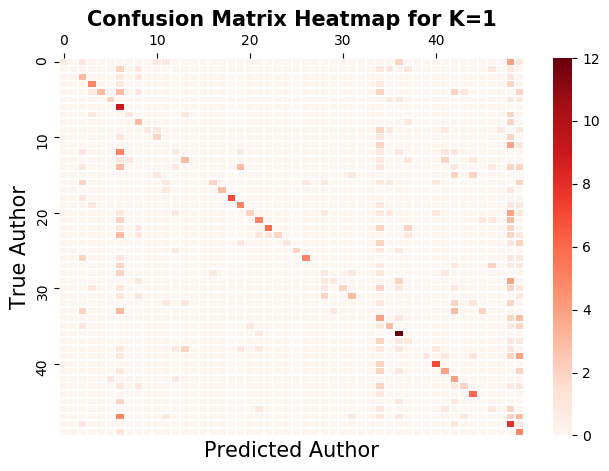

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

fig2 = plt.figure(figsize=(7.5,5), dpi=100)

cm_heatmap = sns.heatmap(confusion_matrix(y_test,pred), xticklabels=10, yticklabels=10, cmap="Reds", linewidths = .5)

cm_heatmap.set_title('Confusion Matrix Heatmap for K=1', fontsize=15, fontweight='bold')
cm_heatmap.set_xlabel('Predicted Author', fontsize=15)
cm_heatmap.set_ylabel('True Author', fontsize=15)
cm_heatmap.set_ylim(50,0)
cm_heatmap.xaxis.set_ticks_position('top')

plt.show(fig2)


The confusion matrix above shows the effectiveness of the model. One can clearly see that most of the dark sqaures feature along the diagonal of the matrix representing correctly predicted classifications. It is interesting to note that our model didnt seem to predict three or four authors very well. You can see stakced dark blocks forming lines in the matrix at around authors 11, 35, 48, and 49 along the x axis. This may be caused by the fact that these authors didn't write is such unique ways as the other authors.

In [19]:
print('K-NN classification Accuracy with K=1: ' 
      + str(round(accuracy_score(y_test, pred)*100,2))+ '%')

K-NN classification Accuracy with K=1: 30.89%


In [20]:
k_pick_runtime = k_pick_end - k_pick_start
knn_runtime = knn_end - knn_start

runtime = pd.DataFrame({'Runtime': [k_pick_runtime, knn_runtime]},
                        index=['Picking K', 'Running K-NN'])
runtime

,Runtime
Picking K,23.234375
Running K-NN,0.703125


# Conclusion

K-NN seemed to work as a reasonable machine learning method on this dataset. With an accuracy score of over 30% that is about 15 times better than randomly guessing (2%) the model seemed to perform adequately. Choosing the K value took the longest time but was vital since choosing the wrong K value could decrease the accuracy score by over 10%. Running K-NN didn't take that long since our dataset wasn't massive but the preprocessing of the data improved the speed and accuracy of the method. 

By carfully looking over the data, the first step was to remove the collumns exclusively containing NaN values. Fortunately there were no NaN values scattered throughout the rest of the dataset. If there were I would've had to deal with them too. Second came getting rid of the collumns containing the apparently random backslashes and hyphens. By removing these collumns alone the accuracy score improved by (INSERT). The final step of our preprocessing was performing PCA on our data. PCA was able to further extract features and shrinked our dataset even further while still preserving 90% of the information. 

K-NN is often used on relatively small datasets because of the fact that training the model is practically instantaneous. The data is stored and that's all that is needed. Once you run the method however and test new samples, the computation that is needed reveals the setbacks of the method. With a much larger dataset K-NN may not be the best method to use for this reason, but for the dataset used above with only 1,500 values (50 authors with 30 reviews each) K-NN proved to work just fine.